# Logistic Regression

*Logistic regression* is a simple machine learning method you can use to predict the value of a numeric categorical variable based on its relationship with predictor variables.


## Logistic Regression Assumptions

- The data is free of missing values
- The predictant variable is binary (that it only accepts two values) or ordinal, (a categorical variable with ordered values)
- All predictors are independent of one another,
- There are at least 50 observations per predictor variable (to ensure reliable results)

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt 
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score


In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

### Load Data

In [4]:
titanic_training = pd.read_csv('../../inputs/titanic.csv')
titanic_training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Variable description

| Column | Description |
| - | - |
| Survived | Survival (0 = No, 1 = Yes) |
| Pclass | Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd) |
| Name | Name |
| Sex | Sex |
| Age | Age  |
| SibSp | Number of Siblings/Spouses Aboard |
| Parch | Number of Parents/Children Aboard  |
| Ticket | Ticket Number |
| Fare | Passenger Fare (British pound) |
| Cabin | Cabin  |
| Embarked | Port of Embarkation (C = Cherbourg, France; Q = Queenstown, UK; S = Southampton, Ireland) |


### Checking that your target variable is binary

<AxesSubplot:xlabel='Survived', ylabel='count'>

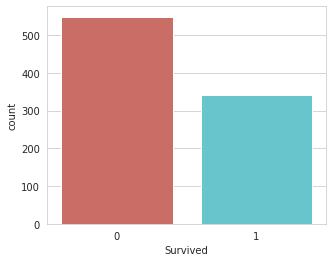

In [6]:
sb.countplot(x='Survived', data=titanic_training, palette='hls')

### Checking for missing values

In [7]:
titanic_training.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
titanic_training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Taking care of missing values

*Dropping missing values*

Let's go ahead and drop all the variables that aren't relevant for predicting survival. 

- Survived - The variable is obviously relevant
- Pclass - Does a passenger's class on a boat affect their survivability?
- Sex - Could a passenger's gender impact their survival rate?
- Age - Does a person's age impact their survival rate?
- SibSp - Does the number of relatives on the boat (that are siblings or spouses) affect a person survivability? Probability
- Parch - Does the number of relatives on the boat (that are parents or children) affect a person survivability? Probability
- Fare - Does the fair a person paid effect his survivability? Maybe - let's keep it
- Embarked - Does a person's point of embarkation matter? It depends on how the boat was filled... Let's keep it 

What about a person's name, ticket number and passenger ID number? They're irrelevant for predicting survivability. So let's drop all of this.

In [9]:
titanic_data = titanic_training.drop(['Name', 'Ticket', 'Cabin'], axis=1)
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
